In [1]:
import random
from operator import itemgetter
import numpy as np

import matplotlib.pyplot as plt

from deap import base, creator
from deap import tools
from tqdm import tqdm

In [2]:
POPULATION_SIZE = 200
N_ITERATIONS = 5000
N_MATINGS = 50

In [3]:
def distance(c1, c2):
    return np.sqrt((c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2)

def evaluate(individual):
    result = 0
    p1 = individual[0]
    for i in range(1, len(individual)):
        p2 = individual[i]
        result += distances[p1][p2]
        p1 = p2
    return result

def mutation(individual, mutationRate):
    for idx1 in range(len(individual)):
        if(np.random.rand() < mutationRate):
            idx2 = np.random.randint(len(individual))
            city1 = individual[idx1]
            city2 = individual[idx2]
            individual[idx1] = city2
            individual[idx2] = city1

    return individual

def offsprings(population):
    for _ in range(N_MATINGS):
        i1, i2 = np.random.choice(range(len(population)), size=2, replace=False)
        offspring1, offspring2 = toolbox.mate(population[i1], population[i2])           
        yield toolbox.mutate(offspring1)
        yield toolbox.mutate(offspring2)

In [4]:
cities = []

with open("xqf131.tsp.txt", "r") as f:
    for l in f:
        line = l.split()
        cities.append([int(line[1]), int(line[2])])

In [5]:
distances = np.zeros((len(cities), len(cities)))
for i in range(len(cities)):
    for j in range(len(cities)):
        distances[i, j] = distance(cities[i], cities[j])

In [6]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [7]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", mutation, mutationRate = 0.01)
toolbox.register("select", tools.selTournament, tournsize=10)

In [8]:
population = toolbox.population(n=POPULATION_SIZE)

In [9]:
fitnesses = [(individual, toolbox.evaluate(individual)) for individual in population]
for individual, fitness in fitnesses:
    individual.fitness.values = (fitness,)

In [14]:
for iteration in tqdm(list(range(1, N_ITERATIONS + 1))):
    cp = list(map(toolbox.clone, population))
    cp += list(offsprings(cp))
    fitnesses = [(individual, toolbox.evaluate(individual)) for individual in cp]

    for individual, fitness in fitnesses:
        individual.fitness.values = (fitness,)

    population[:] = toolbox.select(cp, len(population))

100%|██████████| 5000/5000 [13:33<00:00,  6.15it/s]


In [15]:
fitnesses = sorted([(i, toolbox.evaluate(individual)) for i, individual in enumerate(population)], key=lambda x: x[1])

print(fitnesses[:10])

[(0, 1048.043439014075), (1, 1048.043439014075), (2, 1048.043439014075), (3, 1048.043439014075), (4, 1048.043439014075), (5, 1048.043439014075), (6, 1048.043439014075), (7, 1048.043439014075), (8, 1048.043439014075), (9, 1048.043439014075)]


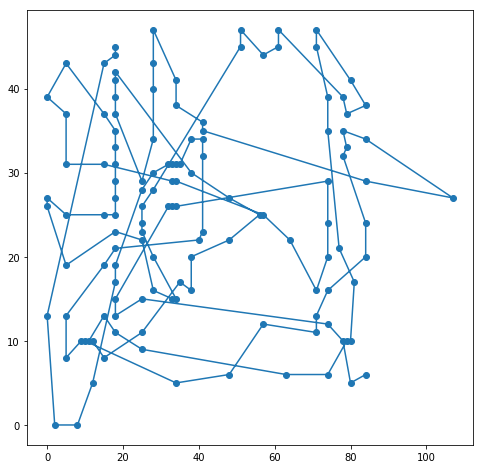

In [16]:
plt.figure(figsize=(8,8))

x = np.array(cities)[:,0]
y = np.array(cities)[:,1]
route_x = itemgetter(*population[0])(x)
route_y = itemgetter(*population[0])(y)

plt.scatter(x, y)
plt.plot(route_x, route_y)